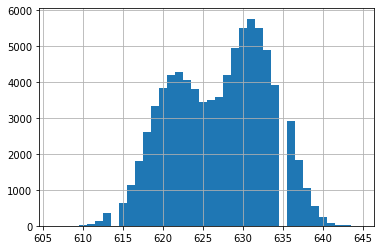

In [1]:
import pandas as pd       ###hist_600###
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_600.txt", delimiter=" ",
                    header=None, names = ("date","time","ir","lidar"))

data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

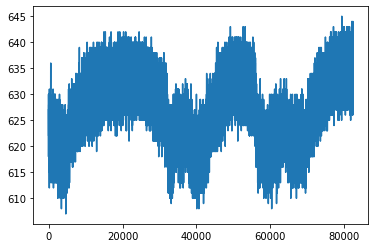

In [2]:
data.lidar.plot() ###plot_all_data##
plt.show()

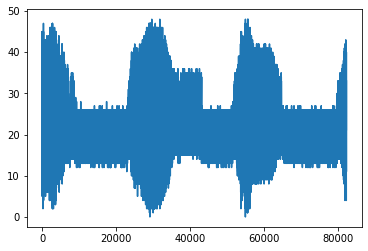

In [3]:
data.ir.plot()
plt.show()

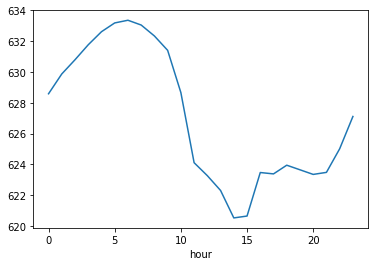

In [4]:
data["hour"] = [e//10000 for e in data.time]  ###hourly_mean###
d = data.groupby("hour")
d.lidar.mean().plot()
plt.show()

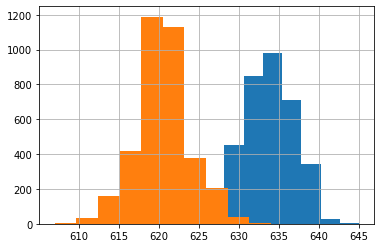

In [5]:
d.lidar.get_group(6).hist()     ###two_mode_hist###
d.lidar.get_group(14).hist()
plt.show()

In [6]:
each_hour = { i : d.lidar.get_group(i).value_counts().sort_index()  for i in range(24)} #時間ごとにデータフレームを作成  ###calc_joint_probs
freqs = pd.concat(each_hour, axis=1) #concatで連結
freqs = freqs.fillna(0)     #欠損値(NaN)を0で埋める
probs = freqs/len(data) #頻度を確率で

probs #表示

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000036,0.000049,0.000000,0.000000,0.000012,0.000012,0.000134,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000146,0.000122,0.000000,0.000000,0.000000,0.000024,0.000073,0.000146,0.000049,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000219,0.000316,0.000000,0.000036,0.000036,0.000061,0.000255,0.000194,0.000024,0.000012
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000620,0.000644,0.000024,0.000182,0.000061,0.000219,0.000680,0.000437,0.000109,0.000024
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001300,0.001045,0.000024,0.000207,0.000267,0.000377,0.000984,0.001021,0.000474,0.000049
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001956,0.001810,0.000219,0.000595,0.000595,0.001021,0.001725,0.001397,0.000595,0.000085
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003111,0.002928,0.000510,0.001264,0.000923,0.001640,0.002211,0.002296,0.001021,0.000146


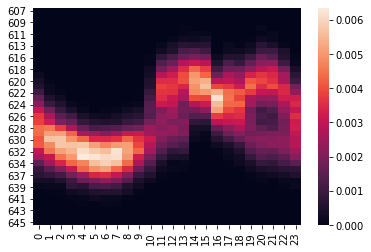

In [7]:
import seaborn as sns   ###2d_hist （下のセルも）

sns.heatmap(probs)
plt.show()

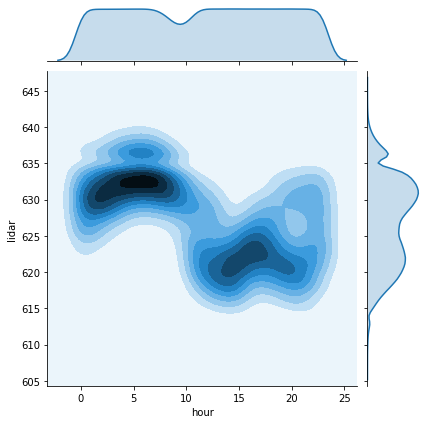

In [8]:
sns.jointplot(data["hour"], data["lidar"], data, kind="kde")
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.043013,0.042916,0.042879,0.042916,0.042964,0.043037,0.043061,0.043001,0.038712,0.028651,...,0.043183,0.043122,0.043061,0.043122,0.043049,0.043086,0.043159,0.042976,0.043049,0.043037


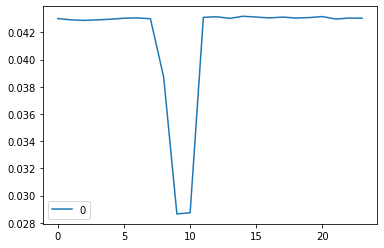

In [9]:
p_t = pd.DataFrame(probs.sum())   #各列を合計   
p_t.plot()
p_t.transpose() #紙面の関係で表を横並びに

In [10]:
p_t.sum()    # 1になる

0    1.0
dtype: float64

,607,608,609,610,611,612,613,615,616,617,...,636,637,638,639,640,641,642,643,644,645
0,0.000012,0.000049,0.000061,0.000328,0.00068,0.00158,0.004241,0.007752,0.013852,0.022053,...,0.03537,0.02226,0.012819,0.006671,0.002989,0.000996,0.000401,0.000109,0.000024,0.000012


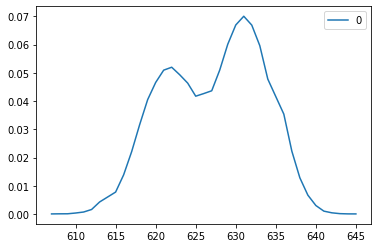

In [11]:
p_z = pd.DataFrame(probs.transpose().sum())        #行と列を転置して各列を合計
p_z.plot()
p_z.transpose()

In [12]:
p_z.sum()

0    1.0
dtype: float64

In [13]:
cond_z_t = probs/p_t[0]  #列（時間）ごとにP(t)で割るとP(x|t)となる   ###lidar600cond
cond_z_t

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000283,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000283,0.000282,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000844,0.001127,0.000000,0.000000,0.000282,0.000282,0.003097,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003376,0.002818,0.000000,0.000000,0.000000,0.000564,0.001689,0.003393,0.001129,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005065,0.007326,0.000000,0.000845,0.000847,0.001410,0.005912,0.004524,0.000564,0.000282
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014350,0.014934,0.000564,0.004227,0.001411,0.005076,0.015766,0.010178,0.002540,0.000565
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030107,0.024232,0.000564,0.004790,0.006209,0.008742,0.022804,0.023749,0.011008,0.001129
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045301,0.041984,0.005079,0.013807,0.013830,0.023689,0.039977,0.032513,0.013830,0.001976
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.072032,0.067906,0.011851,0.029304,0.021451,0.038071,0.051239,0.053435,0.023709,0.003388


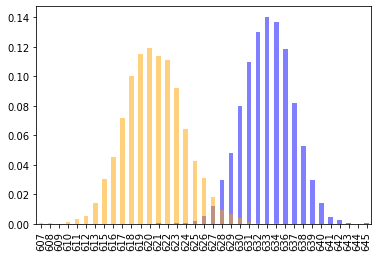

In [14]:
(cond_z_t[6]).plot.bar(color="blue", alpha=0.5)  ###lidar600pxt###
(cond_z_t[14]).plot.bar(color="orange", alpha=0.5) 
plt.show()

In [15]:
cond_t_z = probs.transpose()/probs.transpose().sum() #行と列を入れ替えて同様に計算するとP(t|z)となる  ###lidar600bayes1

print("P(z=630) = ", p_z[0][630]) #センサ値が630になる確率（何時かの情報はない）
print("P(t=13) = ", p_t[0][13]) #時間が13時である確率
print("P(t=13 | z = 630) = ", cond_t_z[630][13])
print("Bayes P(z=630 | t = 13) = ", cond_t_z[630][13]*p_z[0][630]/p_t[0][13])

print("answer P(z=630 | t = 13) = ", cond_z_t[13][630]) #13時にセンサ値が630

P(z=630) =  0.06694936878045224
P(t=13) =  0.043024993620976656
P(t=13 | z = 630) =  0.023230490018148822
Bayes P(z=630 | t = 13) =  0.036147980796385204
answer P(z=630 | t = 13) =  0.036147980796385204


In [18]:
def bayes_estimation(sensor_value, current_estimation):  ###lidar600bayes2
    new_estimation = []
    for i in range(24):
        new_estimation.append(cond_z_t[i][sensor_value]*current_estimation[i])
    print(new_estimation)
    return new_estimation/sum(new_estimation) #正規化

[0.004106875979635727, 0.005674293143461197, 0.005722895226060436, 0.004933111383822797, 0.004301284310032685, 0.0034264468232463765, 0.0034264468232463757, 0.003620855153643334, 0.004337735871982115, 0.003633005674293144, 0.0031712858896003693, 0.0021263411137167226, 0.0017375244529228078, 0.0015552666431756601, 0.00015795676844752797, 8.505364454866891e-05, 0.0006075260324904922, 0.0011178478997825056, 0.0016767718496737585, 0.002089889551767293, 0.0021992442376155817, 0.0021506421550163426, 0.002259996840864631, 0.002831071311405694]


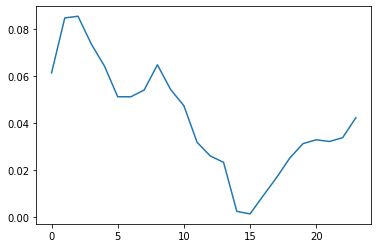

In [19]:
estimation = bayes_estimation(630, p_t[0])  ###lidar600bayesonestep
plt.plot(estimation)

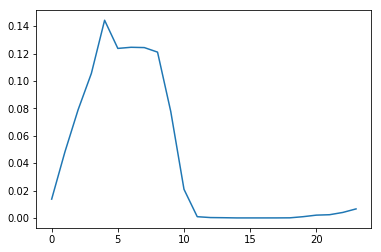

In [18]:
values_5 = [630,632,636] #sensor_data_600.txtから拾ってきた5時台のセンサ値        ###lidar600bayesestm1

estimation = p_t[0]
for v in values_5:
    estimation = bayes_estimation(v, estimation)
    
plt.plot(estimation)

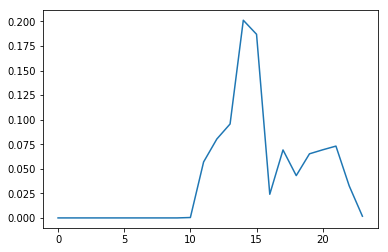

In [19]:
values_11 = [617,624,619] #sensor_data_600.txtから拾ってきた11時台のセンサ値        ###lidar600bayesestm2

estimation = p_t[0]
for v in values_11:
    estimation = bayes_estimation(v, estimation)
    
plt.plot(estimation)

In [20]:
estimation

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00041094, 0.05698215, 0.0803272 , 0.09562647, 0.20123631,
       0.18695225, 0.02407943, 0.06920292, 0.04306357, 0.06525551,
       0.06933473, 0.07310711, 0.03268567, 0.00173573])